# I. Algorithm

First, we will define the functions that compute the Ordinary Least Squares estimates of our coefficients based on our training data. 

In [1]:
# Importing Necessary Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import scipy.stats as stats

In [22]:
def ols_estimate(x,y):
    """
    Returns the coefficient estimates (bo and b1) for simple linear regression
    """
    xbar = np.mean(x)
    ybar = np.mean(y)
    ssy = sum((x-xbar)*(y-ybar))
    ssx = sum((x-xbar)*(x-xbar))
    b1 = ssy/ssx
    b0 = ybar - b1*xbar
    return [b0,b1]

def calculate_residuals(x, y):
    """
    Returns the residuals (y -y_hat) for a simple linear regression model.
    """
    beta = ols_estimate(x, y)
    y_hat = beta[0] + beta[1] * x # Predicted values
    residuals = y - y_hat  # Compute residuals
    
    return residuals

def fitted(x,y):
    """
    Returns the fitted values for a simple linear regression model using the OLS esimates
    """
    beta = ols_estimate(x,y) # Calling coefficients
    return beta[0] + beta[1] * x

def sse(x, y):
    """
    Returns the sum of squared errors (cost function of linear regression)
    """
    # Get the predicted values using the fitted function
    predicted = fitted(x, y)
    
    # Calculate the sum of squared errors (SSE) using list comprehension
    error_squared = sum([(yi - pi) ** 2 for yi, pi in zip(y, predicted)])
    
    return error_squared

# II. Application to Data Set

We will apply linear regression to a dataset on 990 roller coasters around the world. Looking at the first 6 rows, we can see how data is provided on roller coaster's length, speed, location, opening date, type, inversions, and more. 

In this case, we will attempt to determine a relationship between the height of a roller coaster and its top speed.

In [23]:
coaster_data = pd.read_csv("../coaster_db.csv")

In [12]:
coaster_data.head(6)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN


In [13]:
print(f"There are {coaster_data.shape[0]} rows and {coaster_data.shape[1]} columns in our data.")

There are 1087 rows and 56 columns in our data.


We have 1087 roller coasters to work with. However, many of these coasters have missing data. In addition, the 'Length' and 'Speed' columns do not have data formatted in a numeric format. We will first perform some data cleaning.

In [24]:
# Capturing all the heights of roller coasters in feet

coaster_data.loc[coaster_data['height_unit'] == 'ft', 'height_ft'] = coaster_data['height_value']

# Cleaning Data Set To Only Look At length, speed in mph, and type

cleaned_data = coaster_data[['height_ft','speed_mph','Type']]

# Dropping NaN data 
cleaned_data.dropna(inplace = True)


/var/folders/xh/x976_5p93059y1sn4ybh8ql40000gn/T/ipykernel_24633/8693625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.dropna(inplace = True)


In [25]:
print(f"After data cleaning, there are {cleaned_data.shape[0]} rows and {cleaned_data.shape[1]} columns in our data.")


After data cleaning, there are 904 rows and 3 columns in our data.


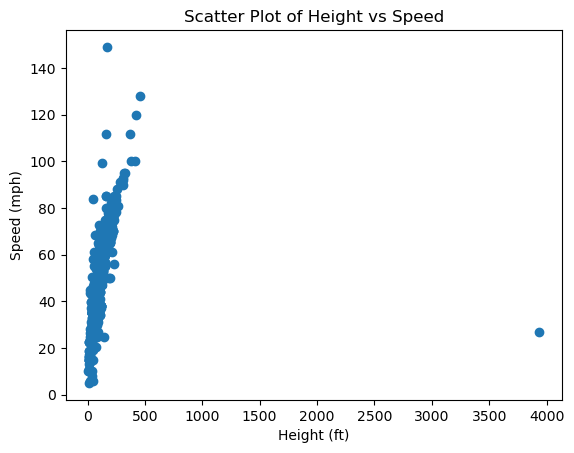

In [26]:
plt.scatter(cleaned_data['height_ft'], cleaned_data['speed_mph'])
plt.xlabel('Height (ft)')
plt.ylabel('Speed (mph)')
plt.title('Scatter Plot of Height vs Speed')
plt.show()

As we can see, there is definitley some rough positive linear trend between height and speed. As height of a roller coaster increases, the top speed also increases on average. Except, there is one incredible outlier. 

In [27]:
cleaned_data[cleaned_data['height_ft']>3500]

,height_ft,speed_mph,Type
905,3937.0,27.0,Steel – Mountain coaster


As you can see, the outlier is a Mountain roller coaster, which is not a traditional roller coaster. The height of 3937 ft is because the roller coaster is built on top of a mountain and not because the coaster undergoes extreme elevation changes. We remove this data point to get a better understsanding of the linear relationship between height and speed.

In [28]:
cleaned_data = cleaned_data[cleaned_data['height_ft'] <= 3500]

height_data = cleaned_data['height_ft'].to_numpy()
speed_data = cleaned_data['speed_mph'].to_numpy()

# Calling OLS_Estimate function on our length and speed data
estimates = ols_estimate(height_data, speed_data)
residuals = calculate_residuals(height_data, speed_data)

print(f"Our estimated y-intercept is {round(estimates[0],3)} mph and slope is {round(estimates[1],3)} mph/ft.")


Our estimated y-intercept is 23.41 mph and slope is 0.251 mph/ft.


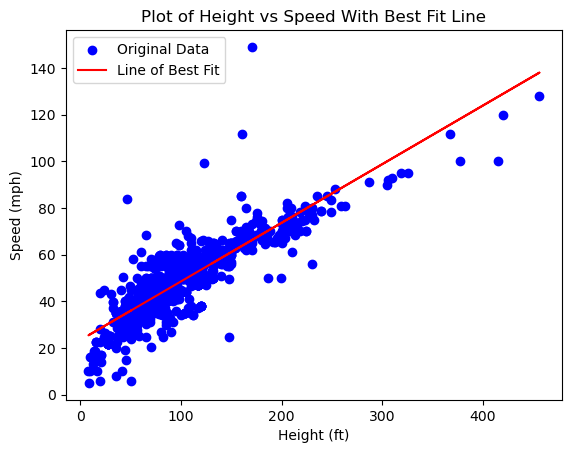

In [29]:

fitted_values = fitted(height_data, speed_data)

plt.scatter(cleaned_data['height_ft'], cleaned_data['speed_mph'], color = 'blue', label = 'Original Data')

plt.plot(height_data, fitted_values, color = 'red',label='Line of Best Fit')

plt.xlabel('Height (ft)')
plt.ylabel('Speed (mph)')
plt.title('Plot of Height vs Speed With Best Fit Line')
plt.legend()
plt.show()


Now, let's look at some diagnositics to evaluate our model.

Our Sum of Squared Errors is 64778.611


Text(0.5, 1.0, 'Residual Plot')

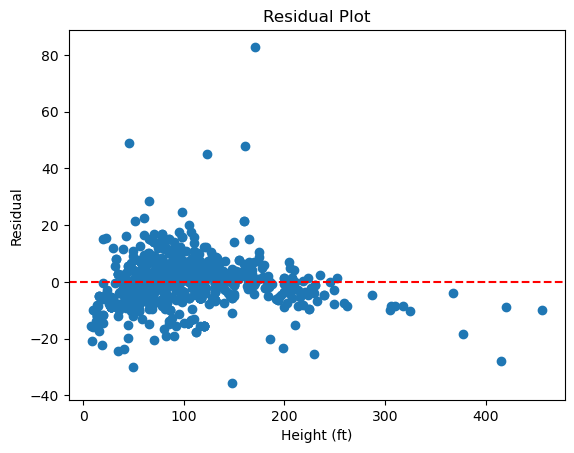

In [30]:
print(f"Our Sum of Squared Errors is {round(sse(height_data,speed_data),3)}")
plt.scatter(height_data, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Height (ft)")
plt.ylabel('Residual')
plt.title('Residual Plot')

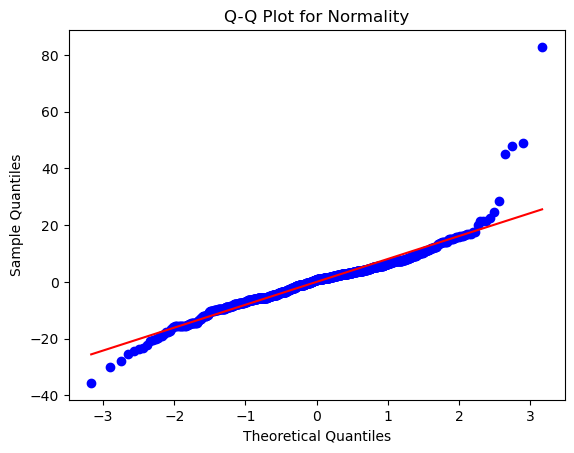

In [ ]:
# Q-Q plot for Normality
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Overall, the residuals do not follow any discernable pattern and scattered randomly about the mean of 0. There are some outliers that correspond to the outliers in the original data. Looking at the QQ plot, most of our residuals follows the quantiles of a normal distribution. However, there are some deviations along the tails. In general, our assumptions of normality is reasonable but could be improved..

This initial model definitley works, but let's try to investigate any data points that deviate from our linear model and see if there are any trends amongst them. Our current SSE around 65000 and can definitley be decreased. There are some roller coasters that use powerful launched systems: these are typically short in height but reach extreme speeds. Perhaps, looking at launched vs. non-launch roller coasters will reveal more insights about the relationship between height and speed.

There are 105 launch roller coasters in our data.
There are 798 non-launch roller coasters in our data.


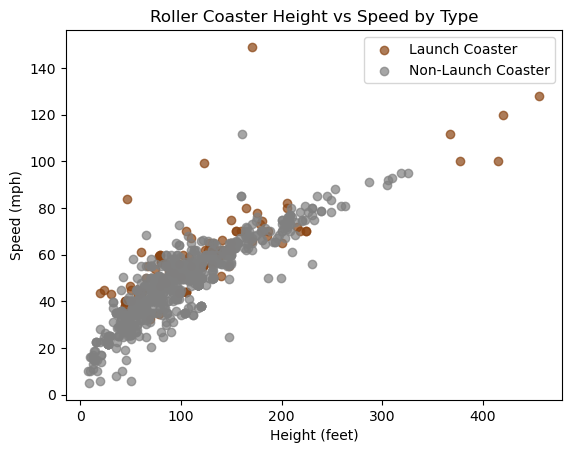

In [32]:
# Separate data for launch and non-launch roller coasters

launch_coasters = cleaned_data[cleaned_data['Type'].str.contains('Launch', case=False, na=False)]
non_launch_coasters = cleaned_data[~cleaned_data['Type'].str.contains('Launch', case=False, na=False)]

print(f"There are {launch_coasters.shape[0]} launch roller coasters in our data.")
print(f"There are {non_launch_coasters.shape[0]} non-launch roller coasters in our data.")

# Plot wood roller coasters
plt.scatter(launch_coasters['height_ft'], launch_coasters['speed_mph'], 
            color='saddlebrown', label='Launch Coaster', alpha=0.7)

# Plot steel roller coasters
plt.scatter(non_launch_coasters['height_ft'], non_launch_coasters['speed_mph'], 
            color='gray', label='Non-Launch Coaster', alpha=0.7)

# Labels and title
plt.xlabel('Height (feet)')
plt.ylabel('Speed (mph)')
plt.title('Roller Coaster Height vs Speed by Type')
# Add legend
plt.legend()
# Show plot
plt.show()

We can see that most of our outliers are launch coasters, which may be impacting the effectiveness of our model. Thus, we will now retry our model by restricting our data to the 798 non-launch roller coasters.

Our estimated y-intercept is 21.539 mph and slope is 0.263 mph/ft.


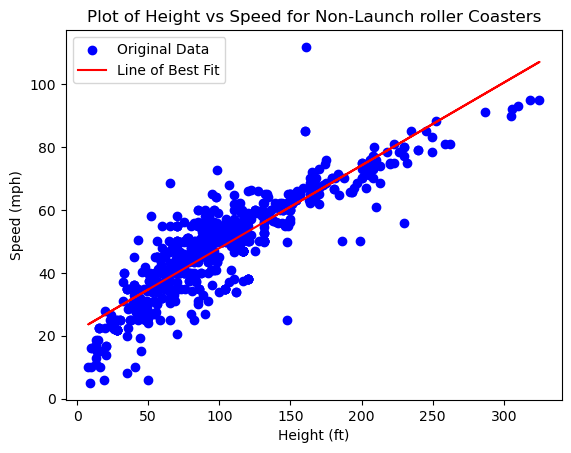

In [33]:
non_launch_estimates = ols_estimate(non_launch_coasters['height_ft'], non_launch_coasters['speed_mph'])
print(f"Our estimated y-intercept is {round(non_launch_estimates[0],3)} mph and slope is {round(non_launch_estimates[1],3)} mph/ft.")

non_launch_fitted = fitted(non_launch_coasters['height_ft'], non_launch_coasters['speed_mph'])

plt.scatter(non_launch_coasters['height_ft'], non_launch_coasters['speed_mph'], color = 'blue', label = 'Original Data')

plt.plot(non_launch_coasters['height_ft'], non_launch_fitted, color = 'red',label='Line of Best Fit')

plt.xlabel('Height (ft)')
plt.ylabel('Speed (mph)')
plt.title('Plot of Height vs Speed for Non-Launch roller Coasters')
plt.legend()
plt.show()



Our Sum of Squared Errors is 44442.606


Text(0.5, 1.0, 'Residual Plot for Non-Launch Coasters')

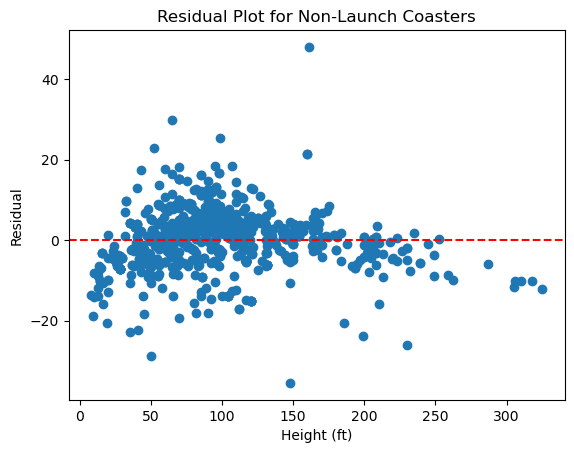

In [34]:
non_launch_residuals = calculate_residuals(non_launch_coasters['height_ft'], non_launch_coasters['speed_mph'])

print(f"Our Sum of Squared Errors is {round(sse(non_launch_coasters['height_ft'],non_launch_coasters['speed_mph']),3)}")

plt.scatter(non_launch_coasters['height_ft'], non_launch_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Height (ft)")
plt.ylabel('Residual')
plt.title('Residual Plot for Non-Launch Coasters')



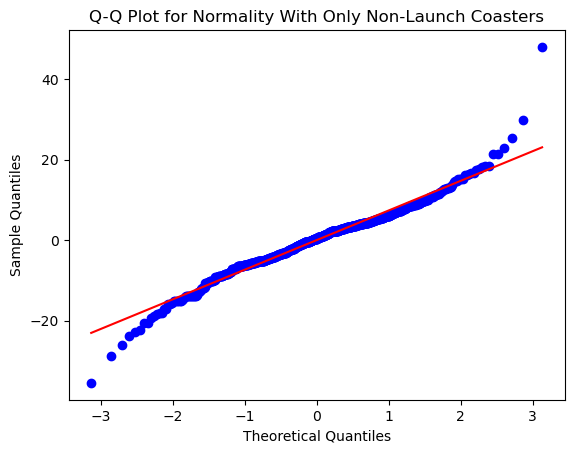

In [36]:
# Q-Q plot for Normality
stats.probplot(non_launch_residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality With Only Non-Launch Coasters")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

As you can see, we have decreased our SSE by around 20000 just by excluding launch roller coasters! The residual plot continues to look good, with no discernable pattern and concern of heteroskedascity (increasing variance in the errors). The QQ plot has most of the extreme outliers removed so we are closer to following a normal distribution. We've found a pretty good model! 

Overall, the takeway is that as height of a roller coaster increases, the top speed also increases. However, with more advancements in roller coaster technology, coasters that feature rapid accleration in the form of launches may have extreme speeds without tall heights. These roller coasters may deviate from our trend.